# Final  Phase 4 Project  Submission

Please fill out:

Student name: Maryam Ghaffari

Student pace: Part time

Scheduled project review date/time:

Instructor name: Morgan Jones

Blog post URL:

# Overview

Farabi hospital is a comprehensive center of excellence in ophthalmology. It is one of the most prestigious hospitals in Iran and serves a large population. It is assumed more than 500 patients visit Farabi Hospital daily. Optical coherence tomography (OCT) imaging is now a standard of care for guiding the diagnosis and treatment of some of the leading causes of blindness worldwide: age-related macular degeneration (AMD) and diabetic macular edema (DME). OCT was routinely done for most patients. The hospital as a stakeholder interested in implementing the diagnostic tool as part of their standard screening and treatment protocols. By using the tool to screen patients for retinal diseases, they could identify cases earlier and provide more effective treatment options, improving patient outcomes and reducing healthcare costs in the long run. Deep learning algorithms can automatically screen OCT images to detect abnormalities and flag them for further examination by a trained ophthalmologist. The use of deep learning in OCT image classification for detecting retina diseases has evolved rapidly over the past decade, with increasingly accurate algorithms being developed and tested in clinical settings.


# Problem Statement & Mission

Accurate detection between OCT images of **retinal diseases** can significantly benefit patients by enabling early detection, personalized treatment, improved monitoring, and reduced healthcare costs. It can also help ophthalmologists make more informed decisions regarding patient care, leading to better patient outcomes. Choroidal Neovascularization (CNV), Diabetic Macular Edema (DME), and Drusen are more common conditions that can affect the health of the retina, but they differ in severity and treatment options. While all three conditions can affect the health of the retina, CNV and DME are generally considered more serious and require more aggressive treatment, as they can cause rapid and severe vision loss if left untreated. Drusen, while generally harmless, can increase the risk of developing age-related macular degeneration, which can cause vision loss over time. Implementing clinical decision support algorithms for medical images faces challenges in terms of accuracy and interpretability. This project attempted to develop a diagnostic tool based on a deep learning framework for screening patients for commonly treatable and blinding retinal diseases. 
This project attempted to develop an effective learning algorithm to process medical images and diagnose the major pathologies in each image accurately. By applying this approach to a dataset of OCT images, I tried to enhance accuracy in classifying CNV and DME.
This proposal has two **primary objectives**:

- Generate a **Convolutional Neural Network (CNN)** which distinguish between the different condition in OCT images with high accuracy.
- Reveal potential indicators in the OCT images in different diagnoses by **highlighting regions recognized by the CNN**. 

# Evaluation Metrics

The model will be a **multi-classification**, meaning that there are four potential classes (CNV, DME, DRUSEN, and NORMAL) that can be placed. While all three conditions can affect the health of the retina, CNV and DME are generally considered more serious and require more aggressive treatment, as they can cause rapid and severe vision loss if left untreated. If the model incorrectly predicts normal or drusen states, it means some patients at higher risk of vision loss would be untreated. Therefore, for the purposes of this work, a **low false-negative** rate has more value than a low false-positive rate. When a low false-negative rate has more value than a low false-positive rate, the metric evaluation of **sensitivity or recall** is more important than specificity or precision. Sensitivity or recall measures the proportion of actual positives that are correctly identified as such by a classification model, while specificity or precision measures the proportion of actual negatives that are correctly identified as such. A low false-negative rate means that the model is **identifying most of the positive cases** correctly, which is particularly important in situations where missing a positive case can have serious consequences. In contrast, a low false-positive rate is more important when the cost of false positives is high, such as in medical testing where false positives can lead to unnecessary treatments and anxiety for patients. The Recall is defined as:

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$ 

$$ \text{Recall} => 0.8 $$ 

# Methodology

Methodology in a data science project refers to the structured approach or process used to carry out the project from start to finish. The general research strategy in this project is to use the OSEMN pipeline on the available dataset to structure their workflow and make it more organized and efficient The OSEMiN pipeline consists of the following five steps:

- **Obtain**: In this step, data is collected from various sources, such as databases, APIs, or web scraping. I downloaded data from "https://data.mendeley.com/datasets/rscbjbr9sj/2"

- **Scrub**: This step involves preparing the input data in a way that makes it suitable for the model to learn the underlying patterns and make accurate predictions including image resizing, image normalization, data augmentation, noise reduction, and Image segmentation. Some or all of this preparation might be needed in my project.

- **Explore**: This step involves visualizing and analyzing the image data to gain insights and identify patterns. The goal is to understand the relationships between variables and identify potential factors that can influence the outcome.

- **Model**: In this step, data is modeled using machine learning algorithms to make predictions or classify data. The goal is to build a model that can accurately predict the outcome based on the input variables.

- **iNterpret**: In this step, the results of the analysis are interpreted and presented to stakeholders. The goal is to communicate the insights gained from the analysis and provide recommendations based on the findings.

## Obtain

The data that will be used for the model has been graciously prepared by the University of California San Diego, Guangzhou Women and Children's Medical Center This dataset contains thousands of validated OCT and Chest X-Ray images described and analyzed in "Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning". The images are split into a training set and a testing set of independent patients. Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: **CNV, DME, DRUSEN, and NORMAL**. I will use the processed CT images hosted by Casper for the neural networks. In order to access these data I download it directly to the local hardware and create a path to the images.

### Install Dependencies and Setup

As usual, we'll start by importing the necessary packages that we'll use in this lab. The pillow is a popular Python library that is used for image processing tasks, such as opening, manipulating, and saving different image file formats. Pillow provides a wide range of image processing functionalities, including image filtering, image enhancement, image transformations, and image generation. Tensorflow for part of the deep learning pipeline, Opencv-python to remove distorted images, and
Matplotlib for visualization were installed.

In [8]:
# Installs the required libraries for running deep learning models for image classification
!pip install pillow

In [9]:
# Installs the required libraries for running deep learning models for image classification
!pip install keras


In [7]:
# Installs the required libraries for running deep learning models for image classification
!pip install tensorflow opencv-python matplotlib


In [166]:
# Check the instalation
! pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

 keras.preprocessing.image and keras.utils.image_utils are modules in the Keras deep learning library that provide utility functions for working with image data.

In [1]:
# Import libraries for keras neural network implementation
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
from keras import models
from keras import layers
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [2]:
# Import metrics modules for checking and visualizing performance of models
from sklearn.metrics import classification_report,confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix

In [3]:
# Split and encode data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [4]:
# from keras.utils.vis_utils import plot_model to display Neural Networks
from tensorflow.keras.utils import plot_model

In [5]:
import tensorflow as tf

# Scrub

In image classification deep learning, the scrub step involves pre-processing the images to ensure that they are in a suitable format for the model to process. The following are some common steps that can be taken during the scrub step:

- **Image resizing**: The images may need to be resized to a consistent size so that they can be fed into the model. This can involve cropping or padding the images to ensure that they are all the same size.

- **Image normalization**: Normalizing the pixel values of the images can help to improve the performance of the model. This can involve scaling the pixel values to a range of 0-1 or -1 to 1, or standardizing the pixel values to have zero mean and unit variance.

- **Data augmentation**: Data augmentation involves creating new training images by applying transformations to the existing images, such as rotations, flips, and shifts. This can help to increase the diversity of the training data and improve the generalization performance of the model.

- **Noise reduction**: Removing noise from the images can help to improve the quality of the input data and make it easier for the model to learn the underlying patterns. This can involve using filters such as Gaussian blur, median filter, or bilateral filter.

- **Image segmentation**: In some cases, it may be useful to segment the images into different regions or objects to extract more meaningful features for classification.

In [2]:
# Define the image size and batch size
IMG_SIZE = (512, 512)
BATCH_SIZE = 62

# Define the directory containing the class sub-directories
data_dir = 'CellData/OCT/train'

# Create an ImageDataGenerator object to preprocess the images
datagen = ImageDataGenerator(rescale=1./255)

# Generate a dataframe with the images and their corresponding labels
data = datagen.flow_from_directory(data_dir,
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical')
df_train = pd.DataFrame({'image': data.filenames, 'label': list(data.classes)})

Found 76309 images belonging to 4 classes.


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108309 entries, 0 to 108308
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   image   108309 non-null  object
 1   label   108309 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ MB


In [12]:
data.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [3]:
# View value counts in dataset
display(df_train['label'].value_counts())
# View percentages of value counts in dataset
display(df_train['label'].value_counts(normalize=True))

3    43140
0    29205
1     3348
2      616
Name: label, dtype: int64

3    0.565333
0    0.382720
1    0.043874
2    0.008072
Name: label, dtype: float64

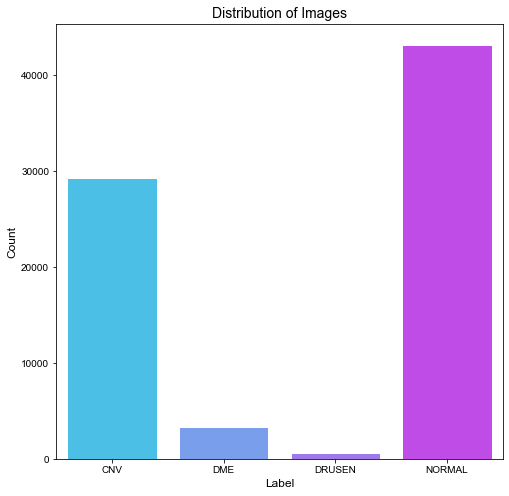

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
s = df_train.label.astype('category')

S = s.cat.rename_categories (['CNV', 'DME', 'DRUSEN', 'NORMAL'])

# Create a matplotlib figure and axis for countplot
fig, ax = plt.subplots(figsize=(8, 8))

# Set style of seaborn plot
sns.set_style('darkgrid')
# Create the countplot for findings in dataframe
ax = sns.countplot(data=df_train, x=S, palette='cool')   

# Create title for countplot
ax.set_title('Distribution of Images', fontsize=14)
# Create X-axis
ax.set_xlabel('Label', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
# Create names on the x axis

plt.show()

Accourding to above plot the train dataset has a strong bias. Almost 47% of the data is Normal. This can be challenging for the network.
I scaled the data by reducing the size of the data in each category to 8000 cases. Therefore, the model can be trained on an equal amount of cases. This ratio is more suitable for data entering the model.  from each category 8000 images are selected randomly and stored in a new train set. 

In [7]:
# Define the image size and batch size
IMG_SIZE = (512, 512)
BATCH_SIZE = 62

# Define the directory containing the class sub-directories
data_dir = 'CellData/OCT/test'

# Create an ImageDataGenerator object to preprocess the images
datagen = ImageDataGenerator(rescale=1./255)

# Generate a dataframe with the images and their corresponding labels
data = datagen.flow_from_directory(data_dir,
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical')
df_test = pd.DataFrame({'image': data.filenames, 'label': list(data.classes)})


Found 1000 images belonging to 4 classes.


In [8]:
df_test.head()

,image,label
0,CNV\CNV-1032178-1.jpeg,0
1,CNV\CNV-1034361-1.jpeg,0
2,CNV\CNV-1034361-2.jpeg,0
3,CNV\CNV-1052341-1.jpeg,0
4,CNV\CNV-1106195-1.jpeg,0


In [10]:
X = df_test['image']
y = df_test['label']

In [12]:
y_train = LabelBinarizer().fit_transform(y)
y_train = to_categorical(y)

In [13]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [6]:
# View value counts in dataset
display(df_test['label'].value_counts())
# View percentages of value counts in dataset
display(df_test['label'].value_counts(normalize=True))

0    250
1    250
2    250
3    250
Name: label, dtype: int64

0    0.25
1    0.25
2    0.25
3    0.25
Name: label, dtype: float64

The test dataset is balanced so it does not have to be balanced.

The next step is to separate an equal number of images from different subdirectories and save them in a new folder

In [45]:
# Importing the necessary libraries
import random
import glob

# Retrieve the file paths of images from four different directories
CNV_files = glob.glob("CellData/OCT/train/CNV/*.jpeg")
DME_files = glob.glob("CellData/OCT/train/DME/*.jpeg")
DRUSEN_files = glob.glob("CellData/OCT/train/DRUSEN/*.jpeg")
normal_files = glob.glob("CellData/OCT/train/NORMAL/*.jpeg")

num_files_to_select = 8000

# randomly selects a specified number of files from each directory and stores them in their respective subdirectories
subdir_CNV_train = random.sample(CNV_files, num_files_to_select)
subdir_DME_train = random.sample(DME_files, num_files_to_select)
subdir_DRUSEN_train = random.sample(DRUSEN_files, num_files_to_select)
subdir_Normal_train = random.sample(normal_files, num_files_to_select)


In [52]:
# Importing the necessary libraries
import os
import shutil

# Set the source directory and the destination directory
source_dir = "CellData/OCT/train"
dest_dir = "CellData/OCT/subset_train"

# Create the destination directory if it does not exist
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Create the subdirectories in the destination directory
subdirs = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
for subdir in subdirs:
    subdir_path = os.path.join(dest_dir, subdir)
    if not os.path.exists(subdir_path):
        os.makedirs(subdir_path)

# Move the image files to the subdirectories
for file in subdir_CNV_train:
    shutil.move(file, os.path.join(dest_dir, 'CNV'))
for file in subdir_DME_train:
    shutil.move(file, os.path.join(dest_dir, 'DME'))
for file in subdir_DRUSEN_train:
    shutil.move(file, os.path.join(dest_dir, 'DRUSEN'))
for file in subdir_Normal_train:
    shutil.move(file, os.path.join(dest_dir, 'NORMAL'))



In [ ]:
Now I check the data subcategories distribution. 

In [79]:
IMG_SIZE = (512, 512)
BATCH_SIZE = 62

# Define the directory containing the class sub-directories
data_dir = 'CellData/OCT/subset_train'

# Create an ImageDataGenerator object to preprocess the images
datagen = ImageDataGenerator(rescale=1./255)

# Generate a dataframe with the images and their corresponding labels
data = datagen.flow_from_directory(data_dir,
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical')
df_train = pd.DataFrame({'image': data.filenames, 'label': list(data.classes)})

Found 32000 images belonging to 4 classes.


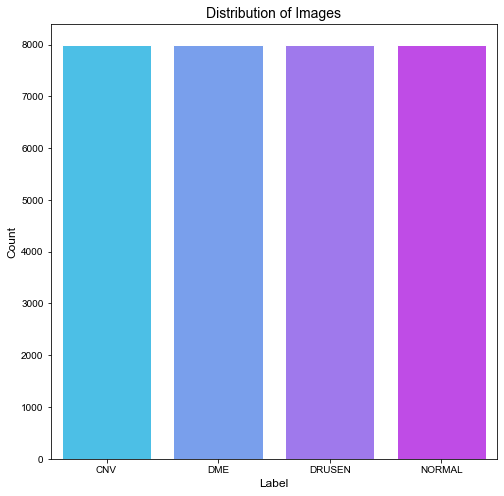

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
s = df_train.label.astype('category')

S = s.cat.rename_categories (['CNV', 'DME', 'DRUSEN', 'NORMAL'])

# Create a matplotlib figure and axis for countplot
fig, ax = plt.subplots(figsize=(8, 8))

# Set style of seaborn plot
sns.set_style('darkgrid')
# Create the countplot for findings in dataframe
ax = sns.countplot(data=df_train, x=S, palette='cool')   

# Create title for countplot
ax.set_title('Distribution of Images', fontsize=14)
# Create X-axis
ax.set_xlabel('Label', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
# Create names on the x axis

plt.show()

## Resizing and Normalization of Images

The next step is to prepare the data for the model is data preparation. This includes loading the images, preprocessing them (e.g., resizing, normalization, augmentation), and dividing them into training, and validation. 

In [13]:
train_dir = 'CellData/OCT/subset_train'
test_dir = 'CellData/OCT/test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# load image data from a directory 
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
    class_mode = 'categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
    class_mode = 'categorical',
        subset='validation')



# Create the datasets.  Get the first batch of images and labels
train_images, train_labels = next(train_generator)
val_images, val_labels = next(validation_generator)


Found 25600 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


I have four Numpy arrays now: train_images, train_labels, test_images, and test_labels. The data are ready to work with them. 

In [28]:
# Preview the shape of both the images and labels for both the train and test sets (4 objects total)
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(val_images))
print(np.shape(val_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(32, 256, 256, 3)
(32, 4)
(32, 256, 256, 3)
(32, 4)
(32, 256, 256, 3)
(32, 4)


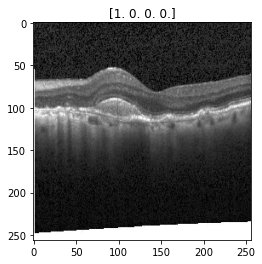

In [27]:
# Importing the necessary librariy
import matplotlib.pyplot as plt


# Get the first image and its label
image = train_images[0]
label = train_labels[0]

# Display the image and its label
plt.imshow(image)
plt.title(label)
plt.show()


# Baseline CNN Model 

In this step, the architecture of the CNN was designed. This includes deciding the number of convolutional layers, pooling layers, and fully connected layers, the size of the filters, and the number of neurons in each layer.

In [118]:
# Importing the necessary libraries
from keras import layers
from keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

# Create baseline model
base_model = Sequential()
# add convolation layer and maxpooling layer 
# model.add(Conv2D(#filters, (size of filter= pixel,pixel), #stide)
base_model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
base_model.add(MaxPooling2D())
# add convolation layer and maxpooling layer 
base_model.add(Conv2D(32, (3,3), 1, activation='relu'))
base_model.add(MaxPooling2D())
# add convolation layer and maxpooling layer 
base_model.add(Conv2D(16, (3,3), 1, activation='relu'))
base_model.add(MaxPooling2D())

base_model.add(Flatten())

base_model.add(Dense(256, activation='relu'))


base_model.add(Dense(4, activation='softmax'))

Let's quickly inspect the shape of the model before training it and see how many training parameters it has.  model's `.summary()` method do it. 

In [119]:
# Inspect the shape of the model
base_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 16)      

## Compilation

After designing the model, it needs to be compiled. This involves specifying the loss function, optimizer, and metrics to be used during training.

In [120]:
# Importing the necessary libraries
import tensorflow as tf
from keras import optimizers

# Compile the model
base_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

Once the model is compiled, it can be trained on the training data. During training, the model is fed with the input data, and the weights of the model are updated based on the loss function and optimizer.

In [121]:
# Training the model
history = base_model.fit(train_generator,
  validation_data= validation_generator,
  epochs=10
)

Epoch 1/10
800/800 [==============================] - 1612s 2s/step - loss: 1.0639 - accuracy: 0.5293 - val_loss: 0.7864 - val_accuracy: 0.6923
Epoch 2/10
800/800 [==============================] - 1672s 2s/step - loss: 0.6414 - accuracy: 0.7527 - val_loss: 0.6559 - val_accuracy: 0.7402
Epoch 3/10
800/800 [==============================] - 1634s 2s/step - loss: 0.4144 - accuracy: 0.8471 - val_loss: 0.6512 - val_accuracy: 0.7572
Epoch 4/10
800/800 [==============================] - 2971s 4s/step - loss: 0.2281 - accuracy: 0.9171 - val_loss: 0.8121 - val_accuracy: 0.7542
Epoch 5/10
800/800 [==============================] - 1713s 2s/step - loss: 0.1161 - accuracy: 0.9613 - val_loss: 0.9661 - val_accuracy: 0.7595
Epoch 6/10
800/800 [==============================] - 1680s 2s/step - loss: 0.0711 - accuracy: 0.9780 - val_loss: 1.0373 - val_accuracy: 0.7641
Epoch 7/10
800/800 [==============================] - 1784s 2s/step - loss: 0.0450 - accuracy: 0.9872 - val_loss: 1.1484 - val_accuracy:

`.history`attribute is used to retrieve the training history of a trained neural network model.

During the training process, Keras stores the loss and accuracy metrics for both the training and validation data at the end of each epoch. These metrics are recorded in a dictionary-like object that is returned by the .fit() method after the training process completes.

The .history attribute can be used to access this dictionary-like object and retrieve the values of the loss and accuracy metrics for both the training and validation data. The keys of the dictionary correspond to the names of the metrics that were specified during the compilation of the model.

In [ ]:
# save model
base_model = base_model.save('base_model.h5')

In [123]:
# Retrieve the training history of a trained neural network model
history.history

{'loss': [1.063931941986084,
  0.641368567943573,
  0.41439831256866455,
  0.22810831665992737,
  0.11608267575502396,
  0.07112642377614975,
  0.0449632927775383,
  0.04015088453888893,
  0.04366396740078926,
  0.03076363541185856],
 'accuracy': [0.5292578339576721,
  0.752734363079071,
  0.8470703363418579,
  0.9171484112739563,
  0.9612500071525574,
  0.9780077934265137,
  0.9871875047683716,
  0.9883202910423279,
  0.9878906011581421,
  0.9929296970367432],
 'val_loss': [0.7864008545875549,
  0.6558901071548462,
  0.6511955261230469,
  0.8120654821395874,
  0.9660965800285339,
  1.0372754335403442,
  1.14835524559021,
  1.4388494491577148,
  1.300977349281311,
  1.3474912643432617],
 'val_accuracy': [0.6923437714576721,
  0.7401562333106995,
  0.7571874856948853,
  0.7542187571525574,
  0.7595312595367432,
  0.7640625238418579,
  0.7478125095367432,
  0.7403125166893005,
  0.7610937356948853,
  0.7412499785423279]}

## Validation

To evaluate the performance of the model during training, it is important to validate it on a validation set. This can help to detect overfitting and adjust the model parameters accordingly

In [124]:
# # Import the necessary librariy
from matplotlib import pyplot as plt

# Define a function to visualize loos accuracy plot
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

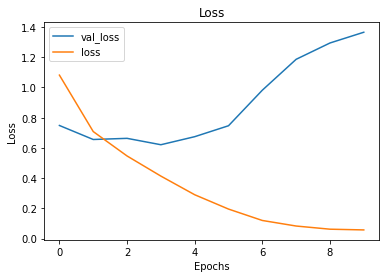

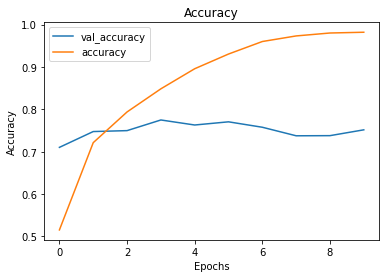

In [20]:
# Use the function
visualize_training_results (history)

According to the accuracy-loss plots, we can see that the **variance is high**. Variance defines the algorithm’s sensitivity to specific sets of data. A model with a high variance pays a lot of attention to training data and does not generalize therefore the validation error or prediction error is far apart from each other. Such models usually perform very well on training data but have high error rates on test data. High Variance causes overfitting in the model. As can be seen in the accuracy_loss plots the model performs well on the training set and gives a low error, but the error in the testing set is very high. 

# Testing

After training and validation, the final step is to test the model on the test data. This can help to evaluate the generalization performance of the model

In [136]:
based_model = keras.models.load_model('base_model.h5')

In [137]:
import tensorflow as tf
import os
from tensorflow import keras
# create a generator object for test data.

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

Found 1000 images belonging to 4 classes.


In [138]:
# make predictions on a set of test data using a generator
filenames = test_generator.filenames
nb_samples = len(filenames)

predict = based_model.predict(test_generator,steps = nb_samples)

1000/1000 [==============================] - 75s 75ms/step


In [68]:
# Show predicted output of the model for each sample in the test set
predict

array([[4.2301462e-10, 1.0000000e+00, 1.3987542e-09, 2.8386429e-10],
       [9.9121207e-01, 8.0617713e-03, 7.2605599e-04, 5.8483369e-08],
       [9.9999964e-01, 4.1267313e-08, 3.8560361e-07, 1.6698487e-15],
       ...,
       [5.2947021e-06, 5.7620442e-09, 9.8227966e-04, 9.9901235e-01],
       [6.4466172e-01, 3.4360420e-03, 3.5180512e-01, 9.7017008e-05],
       [1.3510792e-10, 1.5190587e-07, 6.1189763e-05, 9.9993873e-01]],
      dtype=float32)

Now I use `classification_report` function o generate a text report of the **precision, recall, F1-score**, and support for each class in a classification task.

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get true labels
y_true = test_generator.classes

# Convert predicted probabilities to predicted labels
y_pred = np.argmax(predict, axis=1)

# Print classification report
print(classification_report(y_true, y_pred))

# Print confusion matrix
print(confusion_matrix(y_true, y_pred))

# Print accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.91      0.78       250
           1       0.79      0.80      0.80       250
           2       0.72      0.52      0.61       250
           3       0.83      0.77      0.80       250

    accuracy                           0.75      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.75      0.75      1000

[[228  15   7   0]
 [ 29 201  15   5]
 [ 67  17 131  35]
 [  8  22  28 192]]
Accuracy: 0.752


The report showed that the performance of CNN is not matched with the desired goal that I had determined. So the Model needs more tuning. Before that, I visualized the confusion matrix for a better evaluation of the model. 

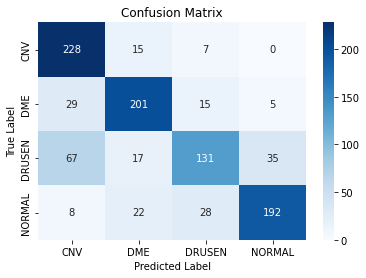

In [70]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a confusion matrix displaying the performance of the model
cm = confusion_matrix(y_true, y_pred)

# Define the labels for the x and y axis
labels = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()


As can be seen in the confusion matrix, the matrix summarizes the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the classifier. In CNV the number of **false negatives** in **CNV** are relatively low but according to the recall result I will try to reduce it more by modifying the model. 

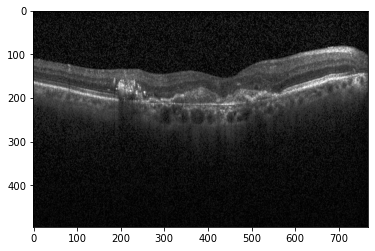

In [23]:
import cv2 
img_CNV = cv2.imread(os.path.join('CellData','OCT','subset_train','CNV', 'CNV-1016042-10.jpeg'))
plt.imshow(img_CNV)

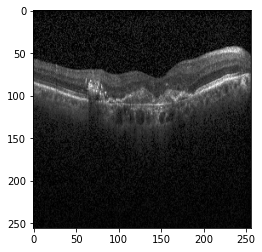

In [24]:
resize = tf.image.resize(img_CNV, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [49]:
np.expand_dims(resize,0)

array([[[[ 1.59375,  1.59375,  1.59375],
         [ 1.40625,  1.40625,  1.40625],
         [ 8.46875,  8.46875,  8.46875],
         ...,
         [ 2.125  ,  2.125  ,  2.125  ],
         [10.3125 , 10.3125 , 10.3125 ],
         [ 0.     ,  0.     ,  0.     ]],

        [[ 3.8125 ,  3.8125 ,  3.8125 ],
         [ 1.     ,  1.     ,  1.     ],
         [ 0.     ,  0.     ,  0.     ],
         ...,
         [ 3.5625 ,  3.5625 ,  3.5625 ],
         [ 4.15625,  4.15625,  4.15625],
         [ 5.96875,  5.96875,  5.96875]],

        [[ 0.     ,  0.     ,  0.     ],
         [ 3.96875,  3.96875,  3.96875],
         [13.625  , 13.625  , 13.625  ],
         ...,
         [ 4.125  ,  4.125  ,  4.125  ],
         [ 3.4375 ,  3.4375 ,  3.4375 ],
         [ 0.     ,  0.     ,  0.     ]],

        ...,

        [[ 0.     ,  0.     ,  0.     ],
         [13.34375, 13.34375, 13.34375],
         [ 1.6875 ,  1.6875 ,  1.6875 ],
         ...,
         [ 4.34375,  4.34375,  4.34375],
         [ 8.03125,  8

In [25]:
y_pred = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 187ms/step


In [51]:
y_pred

array([[9.9983394e-01, 8.9597193e-12, 1.6600617e-04, 2.7074995e-14]],
      dtype=float32)

In [ ]:
{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [26]:
# get predicted class for each input sample
predicted_classes = np.argmax(y_pred, axis=1)
predicted_classes

array([0], dtype=int64)

## Visualizing Feature maps

Visualizing feature maps in a CNN can help us understand how the network is processing the input image at different layers. Feature maps are the output of a convolutional layer and they represent the activation of certain filters in response to the input image. By visualizing the feature maps, we can see what the network is focusing on in the image, and how the feature representation changes as we move deeper into the network.

Visualizing feature maps can help us in several ways:

Debugging: If the model is not performing well, visualizing the feature maps can help us understand why. We can see if certain parts of the image are being ignored, or if the network is focusing on irrelevant features.

Interpretability: By visualizing the feature maps, we can gain insights into what the model has learned. For example, we can see if the model is detecting edges, shapes, or textures, and how it combines these features to make predictions.

Transfer learning: Feature maps from pre-trained models can be used as a starting point for transfer learning. By visualizing the feature maps, we can see which layers are most relevant to the task we want to perform, and fine-tune the network accordingly.

Overall, visualizing feature maps can help us better understand and improve our CNN models.

In [27]:
from keras.utils.image_utils import img_to_array, array_to_img, load_img

In [28]:
img_DME = cv2.imread(os.path.join('CellData','OCT','train','DME', 'DME-15307-3.jpeg'))

# Alter the dimentionality of the array to that of a tensor
img_tensor = np.expand_dims(img_DME, axis=0)

In [29]:
img_tensor = np.expand_dims(resize/255, 0)

In [30]:
#Check tensor shape
print(img_tensor.shape)

(1, 256, 256, 3)


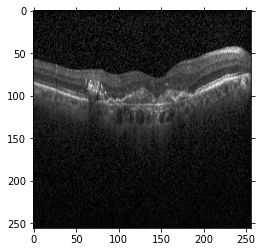

In [31]:
# Preview the first image
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1],[1])
# ax.tick_params(axis=u'both', which=u'both',length=0)
ax.imshow(img_tensor[0])
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
plt.show()

In [32]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in base_model.layers[:8]]

In [33]:
from keras import models
# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=base_model.input, outputs=layer_outputs)

In [34]:
# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 118ms/step


In [35]:
# Create the first activation layer object
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 254, 254, 16)


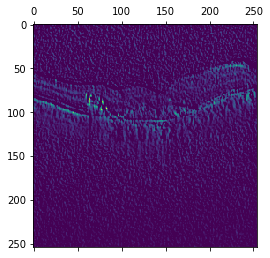

In [36]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.show()

1/1 [==============================] - 0s 30ms/step
(1, 254, 254, 16)


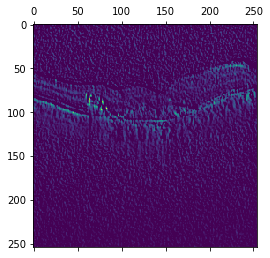

In [37]:
# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

# Create the first activation layer object
first_layer_activation = activations[0]
print(first_layer_activation.shape)

# We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.show()

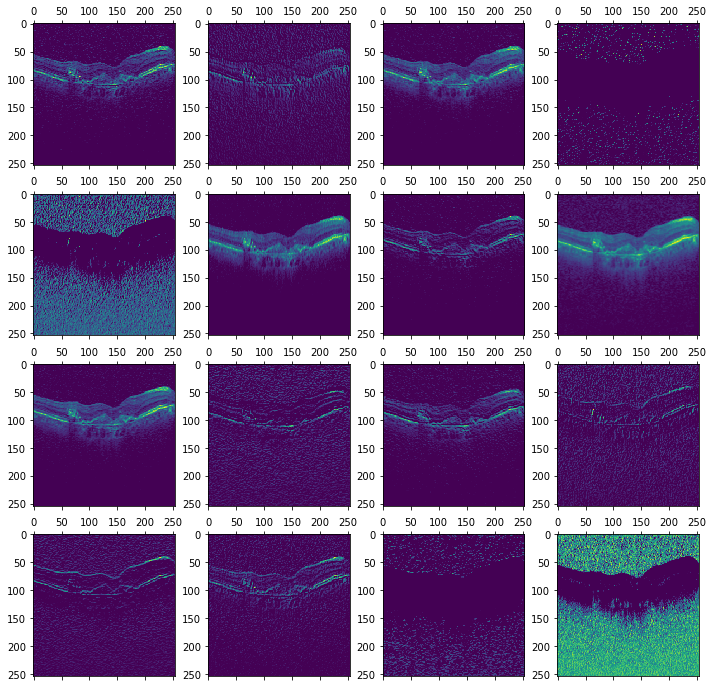

In [38]:
# Visualize all 16 of the channels from the first activation function
fig, axes = plt.subplots(4, 4, figsize=(12,12))
for i in range(16):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

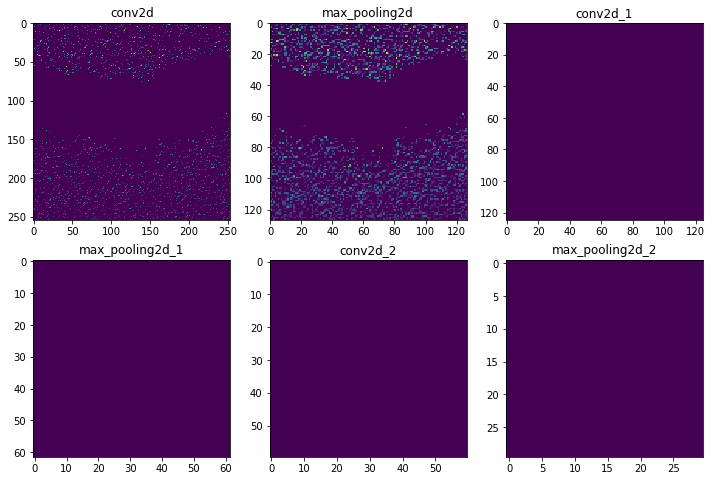

In [39]:
fig, axes = plt.subplots(2,3, figsize=(12,8))

layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

for i in range(6):
    row = i//3
    column = i%3
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :,3], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

In [40]:
img_DME = cv2.imread(os.path.join('CellData','OCT','train','DME', 'DME-15307-3.jpeg'))
img_tensor = np.expand_dims(img_DME, axis=0)
img_tensor = np.expand_dims(resize/255, 0)
layer_outputs = [layer.output for layer in model.layers[:6]]


In [41]:
# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)
# Create the first activation layer object
first_layer_activation = activations[0]


1/1 [==============================] - 0s 100ms/step


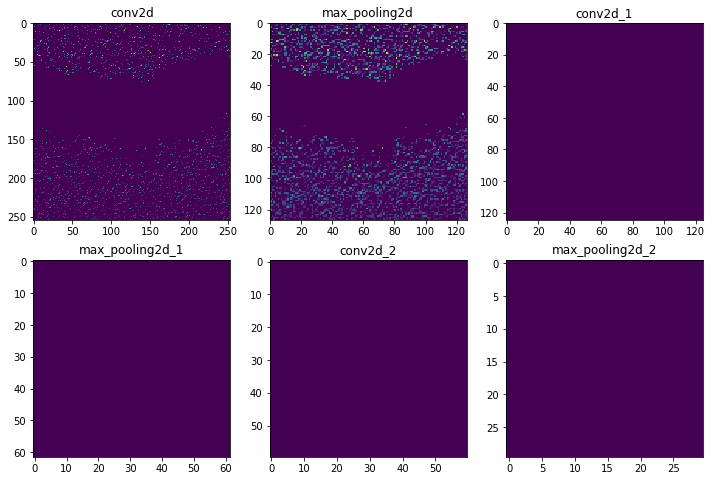

In [42]:
fig, axes = plt.subplots(2,3, figsize=(12,8))

layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

for i in range(6):
    row = i//3
    column = i%3
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :,3], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

In [43]:


# Extract model layer outputs
def layer_visualization(model, img):
    resize = tf.image.resize(img, (256,256))
    img_tensor = np.expand_dims(resize, axis=0)
    img_tensor = np.expand_dims(resize/255, 0)
    layer_outputs = [layer.output for layer in model.layers[:6]]
    
    # Rather then a model with a single output, we are going to make a model to display the feature maps
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    # Returns an array for each activation layer
    activations = activation_model.predict(img_tensor)
    # Create the first activation layer object
    first_layer_activation = activations[0]
    
    fig, axes = plt.subplots(2,3, figsize=(12,8))
    layer_names = []
    for layer in model.layers[:6]:
        layer_names.append(layer.name)

    for i in range(6):
        row = i//3
        column = i%3
        ax = axes[row, column]
        cur_layer = activations[i]
        ax.matshow(cur_layer[0, :, :,3], cmap='viridis')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_title(layer_names[i])

1/1 [==============================] - 0s 96ms/step


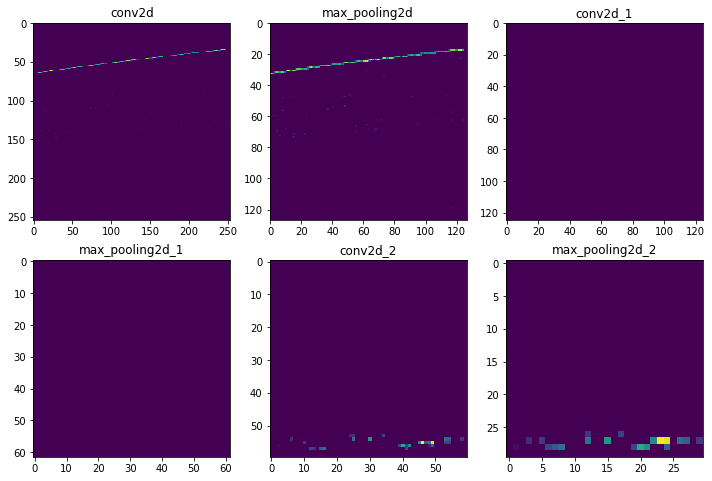

In [44]:
layer_visualization(model, img_DME)

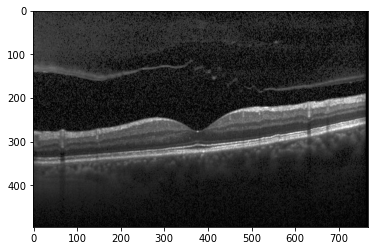

In [45]:
img_NORMAL = cv2.imread(os.path.join('CellData','OCT','train','NORMAL', 'NORMAL-1384-1.jpeg'))
plt.imshow(img_NORMAL)

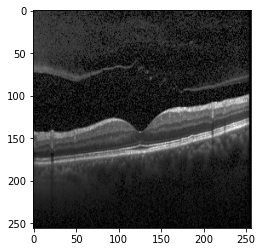

In [62]:
resize = tf.image.resize(img_NORMAL, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
np.expand_dims(resize,0)

array([[[[56.71875, 56.71875, 56.71875],
         [77.625  , 77.625  , 77.625  ],
         [59.96875, 59.96875, 59.96875],
         ...,
         [34.3125 , 34.3125 , 34.3125 ],
         [ 0.     ,  0.     ,  0.     ],
         [ 0.     ,  0.     ,  0.     ]],

        [[67.03125, 67.03125, 67.03125],
         [40.5    , 40.5    , 40.5    ],
         [65.25   , 65.25   , 65.25   ],
         ...,
         [ 5.34375,  5.34375,  5.34375],
         [ 2.1875 ,  2.1875 ,  2.1875 ],
         [ 0.8125 ,  0.8125 ,  0.8125 ]],

        [[57.34375, 57.34375, 57.34375],
         [28.15625, 28.15625, 28.15625],
         [ 7.21875,  7.21875,  7.21875],
         ...,
         [ 0.34375,  0.34375,  0.34375],
         [ 0.     ,  0.     ,  0.     ],
         [ 3.65625,  3.65625,  3.65625]],

        ...,

        [[ 5.34375,  5.34375,  5.34375],
         [19.40625, 19.40625, 19.40625],
         [ 1.3125 ,  1.3125 ,  1.3125 ],
         ...,
         [ 4.34375,  4.34375,  4.34375],
         [ 1.     ,  1

In [64]:
y_pred = model.predict(np.expand_dims(resize/255, 0))
y_pred

1/1 [==============================] - 0s 45ms/step


array([[2.6640169e-05, 3.2100237e-07, 2.4383053e-01, 7.5614244e-01]],
      dtype=float32)

In [65]:
# get predicted class for each input sample
predicted_classes = np.argmax(y_pred, axis=1)
predicted_classes

array([3], dtype=int64)

# Regularization

In some cases, it may be necessary to regularize the model to improve its performance. According to the accuracy-loss plots, we can see that the variance is high. Variance defines the algorithm’s sensitivity to specific sets of data. A model with a high variance pays a lot of attention to training data and does not generalize therefore the validation error or prediction error is far apart from each other. Such models usually perform very well on training data but have high error rates on test data. High Variance causes overfitting in our model. Ac can be seen in the accuracy_loss figure the model performs well on our training set and gives a low error, but the error in our testing set is very high.  Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. There are three main types of regularization techniques: Ridge Regularization (L1), Lasso Regularization (L2), and dropout. Dropout is a widely used regularization technique that randomly drops out some of the neurons in the network during training. This helps prevent overfitting by reducing the co-adaptation of neurons and promoting more robust feature representations. In this step, I use dropout regularization. 


In [54]:
# Create regularized model with dropout
reg_model = models.Sequential()

# Add the appropriate layers
reg_model.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu', 
                input_shape=(256,256,3)))
reg_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

reg_model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
reg_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

reg_model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
reg_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

reg_model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
reg_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

reg_model.add(layers.Flatten())
reg_model.add(layers.Dense(512, activation='relu'))
reg_model.add(layers.Dropout(0.3))
reg_model.add(layers.Dense(512, activation='relu'))
reg_model.add(layers.Dropout(0.3))
reg_model.add(layers.Dense(4, activation='sigmoid'))

# Compile the model
reg_model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(), 
        optimizer='adam', 
        metrics=['accuracy'])



In [55]:
# Return a summary of our model
reg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 128)     

In [56]:
history = reg_model.fit(train_generator,
  validation_data= validation_generator,
  epochs=10
)

Epoch 1/10
800/800 [==============================] - 3171s 4s/step - loss: 0.9787 - accuracy: 0.5663 - val_loss: 0.6770 - val_accuracy: 0.7323
Epoch 2/10
800/800 [==============================] - 9783s 12s/step - loss: 0.6276 - accuracy: 0.7602 - val_loss: 0.5273 - val_accuracy: 0.8059
Epoch 3/10
800/800 [==============================] - 3497s 4s/step - loss: 0.4662 - accuracy: 0.8282 - val_loss: 0.4372 - val_accuracy: 0.8411
Epoch 4/10
800/800 [==============================] - 3615s 5s/step - loss: 0.3563 - accuracy: 0.8717 - val_loss: 0.3794 - val_accuracy: 0.8686
Epoch 5/10
800/800 [==============================] - 3958s 5s/step - loss: 0.2758 - accuracy: 0.9050 - val_loss: 0.4106 - val_accuracy: 0.8562
Epoch 6/10
800/800 [==============================] - 3985s 5s/step - loss: 0.2204 - accuracy: 0.9239 - val_loss: 0.3622 - val_accuracy: 0.8752
Epoch 7/10
800/800 [==============================] - 3894s 5s/step - loss: 0.1670 - accuracy: 0.9421 - val_loss: 0.4495 - val_accuracy

Netron is a great tool for visualizing and exploring deep learning models, and it can help you better understand the CNN model's architecture and parameters. Belwo 

In [81]:
# Install the Netron package
!pip install netron

In [82]:
# Import the necessary library
import netron

In [86]:
# save model
model = reg_model.save('reg_model.h5')

In [87]:
# launch the Netron interface for visualizing the CNN model
netron.start(model)


Serving at http://localhost:8080


('localhost', 8080)

In [88]:
# Install the IPython package
!pip install ipython

In [92]:
%%html
<iframe src="http://localhost:8080/" width="1000" height="300"></iframe>


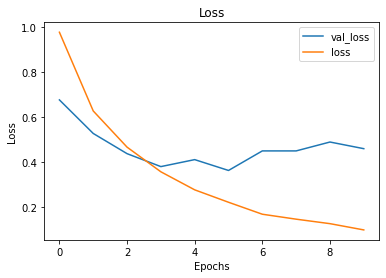

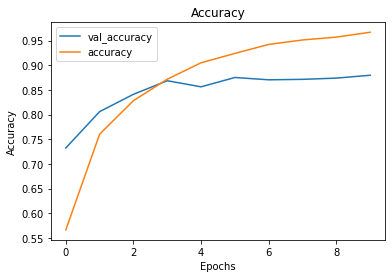

In [57]:
visualize_training_results (history)

In [62]:
predict = reg_model.predict(test_generator,steps = nb_samples)

1000/1000 [==============================] - 72s 71ms/step


In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get true labels
y_true = test_generator.classes

# Convert predicted probabilities to predicted labels
y_pred = np.argmax(predict, axis=1)

# Print classification report
print(classification_report(y_true, y_pred))

# Print confusion matrix
print(confusion_matrix(y_true, y_pred))

# Print accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       250
           1       0.89      0.96      0.92       250
           2       0.95      0.78      0.85       250
           3       0.95      0.89      0.92       250

    accuracy                           0.89      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.90      0.89      0.89      1000

[[235  13   2   0]
 [ 11 239   0   0]
 [ 42   2 194  12]
 [  4  16   8 222]]
Accuracy: 0.89


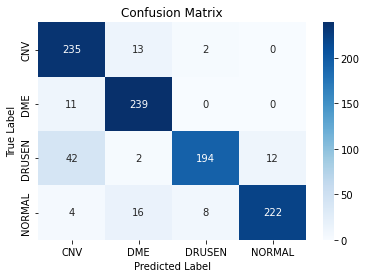

In [64]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a confusion matrix displaying the performance of the model
cm = confusion_matrix(y_true, y_pred)

# Define the labels for the x and y axis
labels = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Set the plot title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()


Through the confusion matrix results on the test dataset, it was reveled that the model showed a low false-negative rate in the CNV and DME. It menas the model is identifying most of the positive cases correctly, which is particularly important in situations where missing a positive case can have serious consequences. In This situation the metric evaluation of sensitivity or recall is more important than specificity or precision. This model could fulfill the objective of this prosoal which was recall > 0.9.

## Feature visualization

In [109]:
from keras.utils.image_utils import img_to_array, array_to_img, load_img
from keras import models

img_CNV = cv2.imread(os.path.join('CellData','OCT','subset_train','CNV', 'CNV-1016042-10.jpeg'))

# Alter the dimentionality of the array to that of a tensor
resize = tf.image.resize(img_CNV, (256,256))

img_tensor = np.expand_dims(resize/255, 0)

In [110]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in reg_model.layers[:8]]

In [111]:
# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=reg_model.input, outputs=layer_outputs)

# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 192ms/step


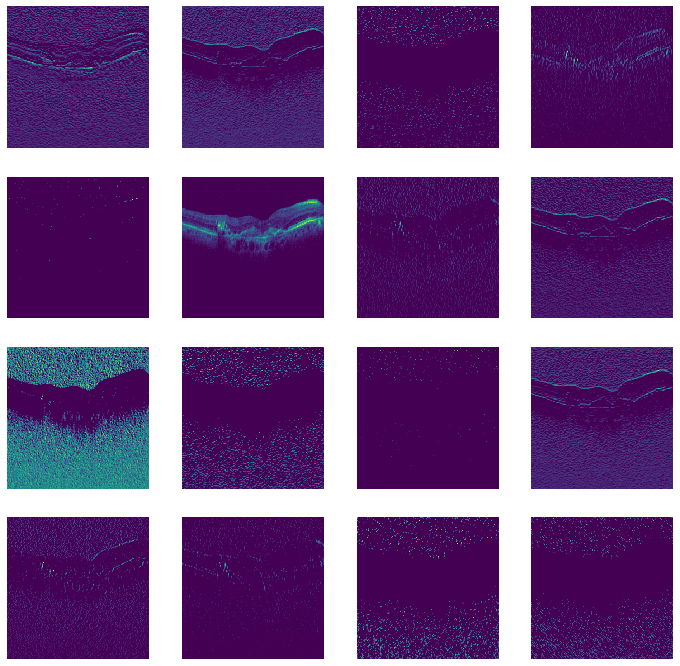

In [114]:
# Visualize all 16 of the channels from the first activation function
fig, axes = plt.subplots(4, 4, figsize=(12,12))
for i in range(16):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis' )
    ax.set_axis_off() # remove grid lines

In [ ]:
# Extract model layer outputs
def layer_visualization(model, img):
    resize = tf.image.resize(img, (256,256))
    img_tensor = np.expand_dims(resize, axis=0)
    img_tensor = np.expand_dims(resize/255, 0)
    layer_outputs = [layer.output for layer in model.layers[:6]]
    
    # Rather then a model with a single output, we are going to make a model to display the feature maps
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    # Returns an array for each activation layer
    activations = activation_model.predict(img_tensor)
    # Create the first activation layer object
    first_layer_activation = activations[0]
    
    fig, axes = plt.subplots(2,3, figsize=(12,8))
    layer_names = []
    for layer in model.layers[:6]:
        layer_names.append(layer.name)

    for i in range(6):
        row = i//3
        column = i%3
        ax = axes[row, column]
        cur_layer = activations[i]
        ax.matshow(cur_layer[0, :, :,3], cmap='viridis')
        ax.xaxis.set_ticks_position('bottom')
        ax.set_title(layer_names[i])

In [71]:
img_DME = cv2.imread(os.path.join('CellData','OCT','train','DME', 'DME-15307-3.jpeg'))

1/1 [==============================] - 0s 172ms/step


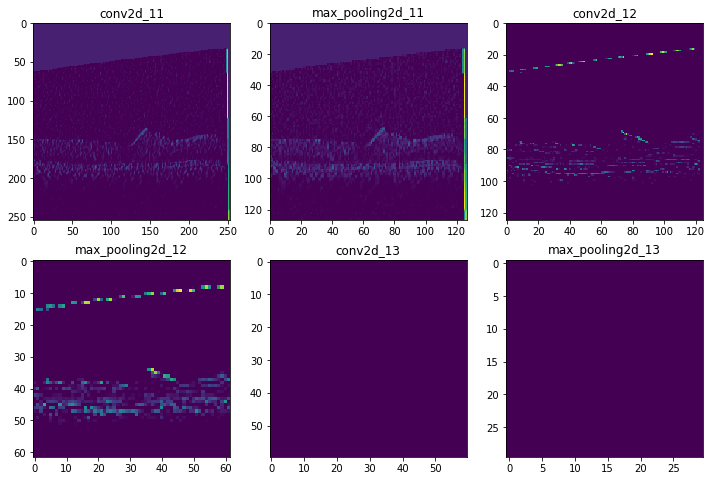

In [72]:
layer_visualization(reg_model,img_DME)

In [73]:
img_NORMAL = cv2.imread(os.path.join('CellData','OCT','train','NORMAL', 'NORMAL-1384-1.jpeg'))

1/1 [==============================] - 0s 125ms/step


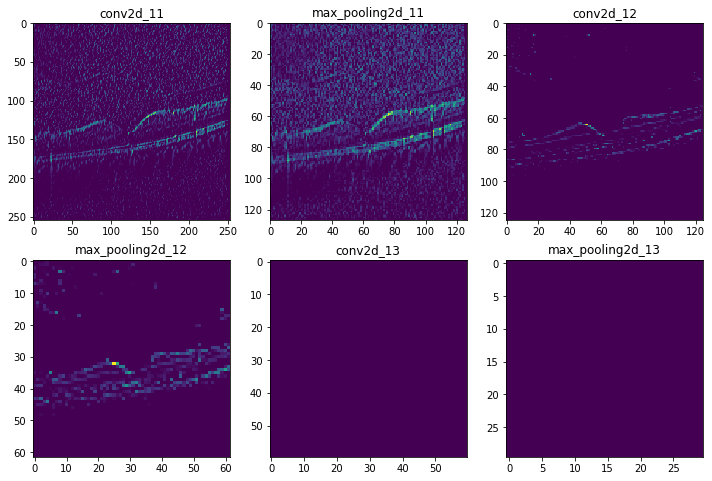

In [74]:
layer_visualization(reg_model,img_NORMAL)

In [75]:
img_CNV = cv2.imread(os.path.join('CellData','OCT','subset_train','CNV', 'CNV-1016042-10.jpeg'))

1/1 [==============================] - 0s 137ms/step


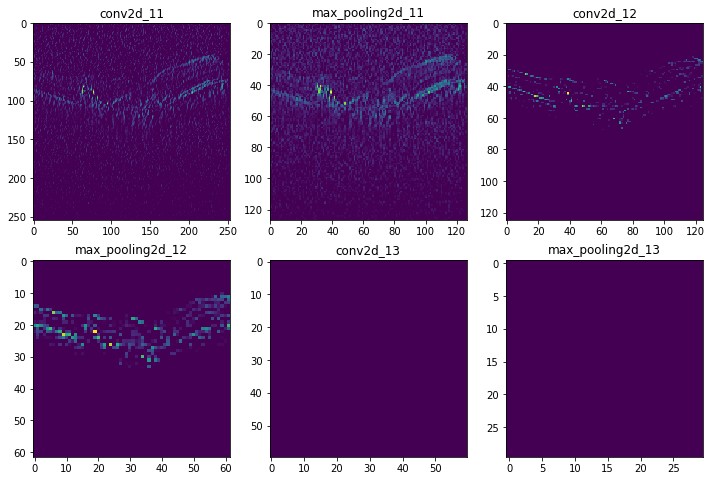

In [77]:
layer_visualization(reg_model,img_CNV)

Visualizing feature maps in a CNN can help us understand how the network is processing the input image at different layers. Feature maps are the output of a convolutional layer and they represent the activation of certain filters in response to the input image. By visualizing the feature maps, we can see what the network is focusing on in the image, and how the feature representation changes as we move deeper into the network. By Comparing the features maps in 4 groups we can gain insights into what the model has learned. For example, we can see the model is detecting edges, shapes and how it combines these features to make predictions.

# Conclusion

In conclusion, this project aimed to develop a deep learning-based diagnostic tool using a convolutional neural network to accurately classify optical coherence tomography (OCT) images of retinal diseases. The use of deep learning algorithms in medical image classification has evolved rapidly over the past decade, and this project demonstrates that the application of such algorithms can significantly benefit patients by enabling early detection, personalized treatment, improved monitoring, and reduced healthcare costs.

The developed CNN model was trained and tested on a dataset of OCT images to distinguish between four potential classes (CNV, DME, DRUSEN, and NORMAL) with a high accuracy rate of 0.89. However, the main focus of the project was to achieve a high recall rate for the more serious conditions, CNV and DME, with a goal of above 0.9. The model achieved a recall of 0.94 and 0.96 for CNV and DME, respectively, indicating a low false-negative rate and a high level of sensitivity in identifying positive cases.

Therefore, the results of this project suggest that implementing deep learning-based diagnostic tools for screening and diagnosis of retinal diseases can significantly improve patient outcomes and reduce healthcare costs by enabling early detection and personalized treatment. However, further research is needed to address challenges in accuracy and interpretability of such algorithms and to ensure their ethical use in clinical settings.